# Rainfall Prediction

In [28]:
import pandas as pd   #importing Libraries
import numpy as np
import matplotlib.pyplot as plt

In [29]:
ds=pd.read_csv("fall.csv")   #Reading Dataset

In [30]:
ds.head()     #Displaying first 5 records

,year,month,day,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg,Rainfall
0,2011,2,13,21,13,60,1009,3,5,0.0
1,2011,2,14,21,18,75,1009,3,5,0.0
2,2011,2,15,22,18,75,1010,3,10,0.0
3,2011,2,16,23,21,86,1011,3,8,0.0
4,2011,2,17,23,19,75,1011,3,8,0.0


In [31]:
ds=ds.drop(['month','day'], axis=1)   #Droping Unnecessary columns

In [32]:
ds.head()    #Displaying first 5 records

,year,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg,Rainfall
0,2011,21,13,60,1009,3,5,0.0
1,2011,21,18,75,1009,3,5,0.0
2,2011,22,18,75,1010,3,10,0.0
3,2011,23,21,86,1011,3,8,0.0
4,2011,23,19,75,1011,3,8,0.0


In [33]:
ds.isnull().sum()      #Checking for any missing values

year             0
tempavg          0
DPavg            0
humidity avg     0
SLPavg           0
visibilityavg    0
windavg          0
Rainfall         0
dtype: int64

In [36]:
x=ds.iloc[:,:7].values     #Assigning variables to the dependent and independent attiributes
y=ds.iloc[:,7].values

In [37]:
x

array([[2011,   21,   13, ..., 1009,    3,    5],
       [2011,   21,   18, ..., 1009,    3,    5],
       [2011,   22,   18, ..., 1010,    3,   10],
       ...,
       [2017,   23,   16, ..., 1014,    4,    5],
       [2017,   23,   17, ..., 1013,    4,    5],
       [2017,   24,   18, ..., 1012,    4,    2]], dtype=int64)

In [38]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
from sklearn.model_selection import train_test_split         #performing train-test split.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=0)   

In [40]:
x_train

array([[2015,   30,   27, ..., 1004,    6,   14],
       [2015,   29,   26, ..., 1008,    6,   13],
       [2017,   25,   22, ..., 1012,    4,   14],
       ...,
       [2013,   28,   26, ..., 1003,    5,   10],
       [2013,   23,   22, ..., 1007,    5,   11],
       [2016,   18,   14, ..., 1017,    2,   13]], dtype=int64)

In [41]:
from sklearn.ensemble import RandomForestRegressor       #Model building using Random Forest
regressor = RandomForestRegressor(n_estimators=100, random_state = 0)
regressor.fit(x_train, y_train)


RandomForestRegressor(random_state=0)

In [42]:
ypred =regressor.predict(x_test)     #Predicting using testing data on trained data.

In [43]:
ypred

array([7.18700000e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.67110000e+00, 1.51170000e+00, 2.18380000e+00, 8.64940000e+00,
       2.54000000e-01, 0.00000000e+00, 6.47110000e+00, 5.10000000e-03,
       4.97400000e+00, 7.31500000e-01, 1.17830000e+00, 1.77600000e-01,
       0.00000000e+00, 4.55722000e+01, 6.93180000e+00, 1.01308000e+01,
       2.02310000e+00, 2.84500000e-01, 0.00000000e+00, 7.50000000e-03,
       1.22150000e+00, 0.00000000e+00, 6.98600000e-01, 1.26900000e-01,
       0.00000000e+00, 2.12630000e+00, 6.16950000e+00, 0.00000000e+00,
       3.81320000e+00, 0.00000000e+00, 1.51974000e+01, 0.00000000e+00,
       4.14550000e+00, 0.00000000e+00, 5.60000000e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.01400000e-01, 6.14700000e-01,
       9.55020000e+00, 5.05300000e-01, 2.03000000e-02, 9.43910000e+00,
       6.08290000e+00, 3.09360000e+00, 1.33870000e+00, 2.94513000e+01,
      

In [44]:
y_test.shape


(473,)

In [45]:
from sklearn.metrics import r2_score #Testing accuracy
r2_score(y_test,ypred)

0.2728975259726836

In [46]:
x_train.shape

(1889, 7)

In [47]:
y_train.shape

(1889,)

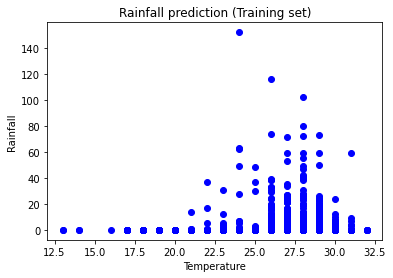

In [53]:
plt.scatter(x_train[:,1],y_train,color='blue')      #Displaying relation b/w temp and rainfall
plt.title('Rainfall prediction (Training set)')
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.show()

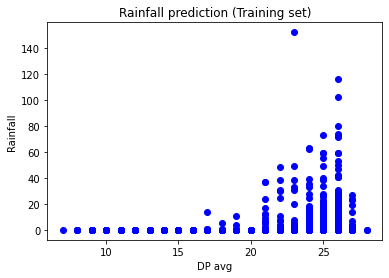

In [54]:
plt.scatter(x_train[:,2],y_train,color='blue')      #Displaying relation b/w dp avg and rainfall
plt.title('Rainfall prediction (Training set)')
plt.xlabel('DP avg')
plt.ylabel('Rainfall')
plt.show()

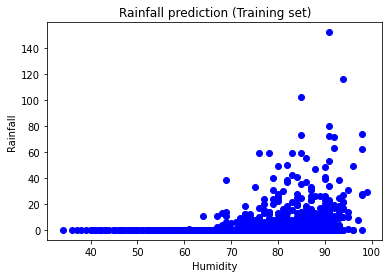

In [55]:
plt.scatter(x_train[:,3],y_train,color='blue')      #Displaying relation b/w humidity and rainfall
plt.title('Rainfall prediction (Training set)')
plt.xlabel('Humidity')
plt.ylabel('Rainfall')
plt.show()

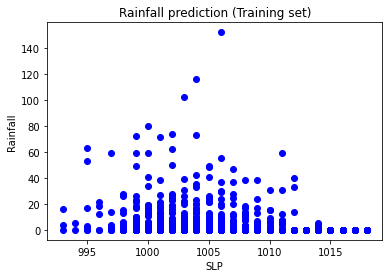

In [56]:
plt.scatter(x_train[:,4],y_train,color='blue')      #Displaying relation SLP and rainfall
plt.title('Rainfall prediction (Training set)')
plt.xlabel('SLP')
plt.ylabel('Rainfall')
plt.show()

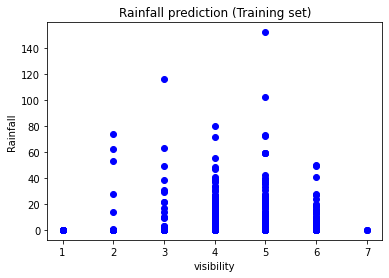

In [58]:
plt.scatter(x_train[:,5],y_train,color='blue')      #Displaying relation b/w visibility and rainfall
plt.title('Rainfall prediction (Training set)')
plt.xlabel('visibility')
plt.ylabel('Rainfall')
plt.show()

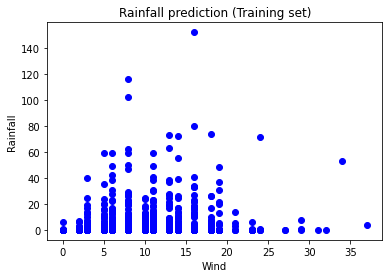

In [59]:
plt.scatter(x_train[:,6],y_train,color='blue')     #Displaying relation b/w Wind and rainfall
plt.title('Rainfall prediction (Training set)')
plt.xlabel('Wind')
plt.ylabel('Rainfall')
plt.show()

In [60]:
ds.corr()     #Co-relation b/w attributes

,year,tempavg,DPavg,humidity avg,SLPavg,visibilityavg,windavg,Rainfall
year,1.000000,0.090248,0.044044,-0.091357,0.085676,-0.082626,0.110007,0.041735
tempavg,0.090248,1.000000,0.863829,0.340977,-0.674395,0.704721,0.233133,0.070369
DPavg,0.044044,0.863829,1.000000,0.731021,-0.758224,0.604098,0.213889,0.177919
humidity avg,-0.091357,0.340977,0.731021,1.000000,-0.574413,0.173502,0.101864,0.297830
SLPavg,0.085676,-0.674395,-0.758224,-0.574413,1.000000,-0.557946,-0.378632,-0.242161
visibilityavg,-0.082626,0.704721,0.604098,0.173502,-0.557946,1.000000,0.244426,-0.022533
windavg,0.110007,0.233133,0.213889,0.101864,-0.378632,0.244426,1.000000,0.164852
Rainfall,0.041735,0.070369,0.177919,0.297830,-0.242161,-0.022533,0.164852,1.000000


In [61]:
import seaborn as sns      #importing seaborn Library

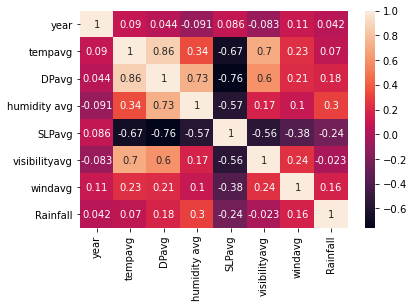

In [62]:
sns.heatmap(ds.corr(),annot=True)    #Displaying Co-relation b/w attributes using Heatmap

In [68]:
ypred1= regressor.predict([[2020,18,16,65,1013,6,8]])      #Predicting new data record.   

In [69]:
ypred1     #prediction

array([0.5184])


# Done